# LINEAR REGRESSION USING GRADIENT DESCENT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data

Column 0 is unwanted so droping it.

In [2]:
df=pd.read_csv('house.csv')
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,bd,sqft,price
0,1,1370,451000.0
1,4,2060,899000.0
2,4,1738,944000.0
3,3,1588,715000.0
4,4,2092,897000.0


### X contains the features of our data. In order to run gradient descent, the dataframe is converted into numpy array. 

In [3]:
X = df[['bd','sqft']].to_numpy()
print(X)

[[   1 1370]
 [   4 2060]
 [   4 1738]
 ...
 [   3 1498]
 [   3 1695]
 [   2 1384]]


### Outliers may affect our model, in order to avoid it, features are normalized. Column of 1's is added to the X variable.     

In [4]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs
    return normalized

X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))
print(X)

[[ 1.         -1.34110196 -0.67537445]
 [ 1.          1.34246879  1.91600044]
 [ 1.          1.34246879  0.70669216]
 ...
 [ 1.          0.44794521 -0.19465563]
 [ 1.          0.44794521  0.54520068]
 [ 1.         -0.44657838 -0.62279583]]


### y variable has the target/values to be predicted.

In [5]:
y = df['price'].values/1000
print(y)

[451. 899. 944. ... 687. 750. 644.]


## The objective of linear regression is to minimize the cost function 

# J(a0,a1,a2)= 1/2m ∑i = 1m( ( a0 + a1x(i) + a2x(i) )−y(i) )2

## where the hypothesis h(a)  is given by the linear model h(a) = ( a0 + a1x(i) + a2x(i) ) 
## i.e h(a) = a' * X


In [6]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

### To find the optimal parameters a we needed the gradient of J(a) when we used the gradient descent algorithm

### ∇w.r.t.a ( J(a) ) = 1/m ( X′X a − X′ y )

### alpha is the learning rate. 

In [7]:
def gradient_descent_multi(X, y, alpha, iterations):
    
    theta = np.zeros(X.shape[1])
    m = len(X)
    
    j_history = np.zeros(iterations)
    theta_0_hist = []
    theta_1_hist = [] 
    theta_2_hist = []
    
    for i in range(iterations):
        
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        
        theta_0_hist.append(theta[0])
        
        theta[0] = 659.383      
        j_history[i] = compute_cost(X,y,theta)
        theta_1_hist.append(theta[1])
        theta_2_hist.append(theta[2])
        
    
    return theta ,j_history, theta_1_hist, theta_2_hist

alpha = 0.1
iterations = 100

#Computing the gradient descent
theta_result,J_history, theta_1, theta_2 = gradient_descent_multi(X,y,alpha,iterations)

### Matrix form of the of the solution for the model parameters.

### a =  inverse( X′ X )   X′ y

In [8]:
np.matmul((np.matmul((np.linalg.inv(np.matmul(X.T,X))),X.T)),y)

array([659.3833653 , 111.79044715,  53.26330653])

In [9]:
y=y.reshape(-1,1)

In [10]:
# #Computing the gradient descent
T0, T1 = np.meshgrid(range(-20,200,6),range(-20,200,6))

In [11]:
#Computing the cost function for each theta combination
zs = np.array(  [compute_cost(X, y, np.array([659.383,t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)

In [12]:
J_history.shape

(100,)

# SURFACE PLOT    &    CONTOUR PLOT

In [13]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Angles needed for quiver plot
anglesx = np.array(theta_1)[1:] - np.array(theta_1)[:-1]
anglesy = np.array(theta_2)[1:] - np.array(theta_2)[:-1]

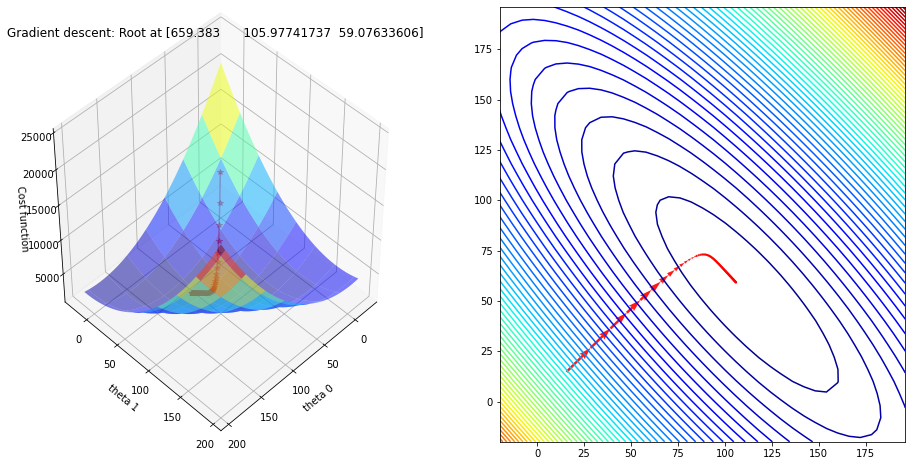

In [14]:
%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_1,theta_2,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_1[:-1], theta_2[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()